In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("sample_data/HeartDisease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [19]:
# Memeriksa distribusi nilai pada kolom target
df["num"].value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13


In [20]:
# Mengecek jumlah nilai NaN di setiap kolom
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [21]:
# Mengisi nilai NaN dengan mean dari masing-masing kolom
df.fillna(df.mean(), inplace=True)

# Memeriksa kembali apakah masih ada NaN
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [22]:
# Mengubah target menjadi biner (0 = tidak ada penyakit, 1 = ada penyakit)
df["num"] = np.where(df["num"] > 0, 1, 0)

# Memisahkan fitur dan target
X = df.drop(columns=["num"])
y = df["num"]

# Membagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Menampilkan hasil evaluasi
print("Nilai Akurasi: ",accuracy)
print("Nilai Presisi: ",precision)
print("Nilai Recall: ",recall)
print("Nilai F1: ",f1)
print("Nilai roc_auc: ",roc_auc)

Nilai Akurasi:  0.8524590163934426
Nilai Presisi:  0.7878787878787878
Nilai Recall:  0.9285714285714286
Nilai F1:  0.8524590163934426
Nilai roc_auc:  0.9491341991341992


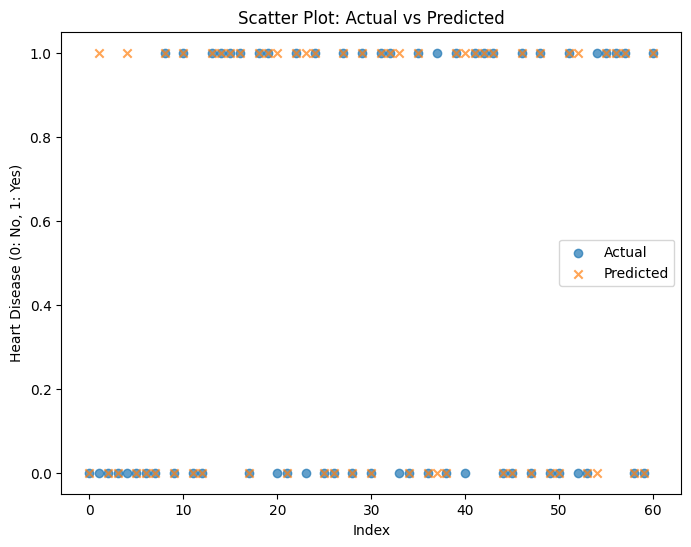

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", marker='o', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", marker='x', alpha=0.7)
plt.xlabel("Index")
plt.ylabel("Heart Disease (0: No, 1: Yes)")
plt.legend()
plt.title("Scatter Plot: Actual vs Predicted")
plt.show()


#**PENJELASAN**


1.   Akurasi
*   Akurasi mengukur seberapa sering model membuat prediksi yang bener terhadap keseluruhan data.
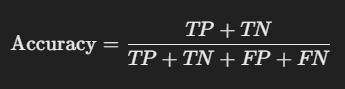
*   Penjelasan:
  - TP (True Positive): Model memprediksi "1" (ada penyakit) dan benar.
  - TN (True Negative): Model memprediksi "0" (tidak ada penyakit) dan benar.
  - FP (False Positive): Model memprediksi "1" tetapi seharusnya "0".
  - FN (False Negative): Model memprediksi "0" tetapi seharusnya "1".

2.   Presisi
- Presisi mengukur seberapa banyak dari semua prediksi positif yang benar.

  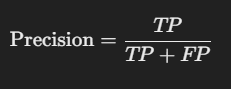

- Penjelasan:
  - Semakin tinggi presisi, semikin sedikit (kesalahan False Positive).
  - Berguna jika kita ingin meminimalkan kesalahan positif (misalnya, tes kanker, di mana kesalahan False Positive bisa menyebabkan stress bagi pasien).

3. Recall (True Positive Rate)
*   Recall mengukur seberapa banyak kasus positive yang benar-benar berhasil ditemukan oleh model.

  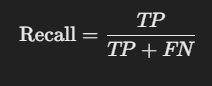
*   Penjelasan:
 - semakin tinggi recall, semakin sedikit kesalahan False Negative.
 - Berguna jika kita ingin menangkap sebanyak mungkin kasus positive, misalnya pada deteksi penyakit berbahaya seperti kanker.

4. F1-Score (Harmonic Mean of Precision & Recall)
- F1-Score adalah rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara keduanya.

  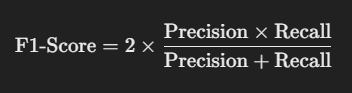

- Penjelasan:
  - F1-Score sangat berguna ketika dataset tidak seimbang.
  - Jika kita hanya mengandalkan akurasi pada dataset yang tidak seimbang, hasilnya bisa menyesatkan.

5. ROC-AUC (Receiver Operating Characteristic - Area Under Curve).
- ROC-AUC mengukur kemampuan model dalam membedakan kelas positif dan negatif berdasarkan probabilitas prediksi.
  - ROC Curve: Grafik yang menunjukkan Trade-off antara True Positive Rate (Recall) dan False Positive Rate (FPR).
  - AUC (Area Under Curve): Luas di bawah kurva ROC yang menunjukkan seberapa baik model mengklasifikasikan positif dan negatif.
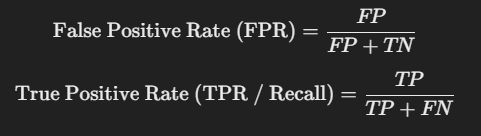

  - Nilai AUC = 1.0 → Model sempurna.
  - Nilai AUC = 0.5 → Model sama seperti tebakan acak.
  - Nilai AUC < 0.5 → Model lebih buruk dari tebakan acak.



